In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams.update({"font.size":20})

# Read data

In [3]:
powerplants = pd.read_csv("../Datasets/power_plants.csv")

In [4]:
powerplants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7938 entries, 0 to 7937
Data columns (total 12 columns):
longitude             7938 non-null float64
latitude              7938 non-null float64
plant_name            7829 non-null object
utility_name          7828 non-null object
sector_name           7827 non-null object
city                  7826 non-null object
county                7834 non-null object
state_name            7833 non-null object
primary_source        7937 non-null object
total_power           7826 non-null float64
source_description    7826 non-null object
tech_description      7826 non-null object
dtypes: float64(3), object(9)
memory usage: 744.3+ KB


In [5]:
powerplants.head()

,longitude,latitude,plant_name,utility_name,sector_name,city,county,state_name,primary_source,total_power,source_description,tech_description
0,-87.356823,33.458665,Bankhead Dam,Alabama Power Co,Electric Utility,Northport,as,Alabama,hydroelectric,56.0,g,Conventional Hydroelectric
1,-88.010300,31.006900,Barry,Alabama Power Co,Electric Utility,Bucks,Mobile,Alabama,coal,2160.5,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...
2,-86.283056,32.583889,Walter Bouldin Dam,Alabama Power Co,Electric Utility,Wetumpka,Elmore,Alabama,hydroelectric,225.9,Hydroelectric = 225.9 MW,Conventional Hydroelectric
3,-85.970800,34.012800,Gadsden,Alabama Power Co,Electric Utility,Gadsden,Etowah,Alabama,natural gas,130.0,Natural Gas = 130 MW,Natural Gas Steam Turbine
4,-87.196486,33.644344,Gorgas,Alabama Power Co,Electric Utility,Parrish,Walker,Alabama,coal,1034.0,Coal = 1034 MW,Conventional Steam Coal


In [69]:
powerplants["total_power"].max()

7079.0

In [78]:
pivot_table = powerplants.groupby(["state_name", "primary_source"])["total_power"].sum().reset_index().pivot_table(
    index="state_name", columns="primary_source", values="total_power", fill_value=0).sort_values(by="coal",ascending=False)
pivot_table["coal_percentage"] = pivot_table["coal"] / pivot_table.sum(axis=1)


primary_source,biomass,coal,geothermal,hydroelectric,natural gas,nuclear,other,petroleum,pumped storage,solar,wind,coal_percentage
state_name,,,,,,,,,,,,
Texas,492.5,25696.5,0.0,638.2,66890.3,4960.0,468.2,96.9,0.0,579.9,19899.6,0.214635
Indiana,77.5,16267.1,0.0,60.4,5940.2,0.0,678.3,250.3,0.0,160.5,1889.7,0.642359
Ohio,151.1,15322.0,0.0,101.9,9789.4,2134.0,240.1,489.4,0.0,45.5,533.9,0.531879
Illinois,110.3,14902.8,0.0,24.1,13885.9,11589.6,206.9,598.1,0.0,31.6,4000.8,0.328617
Kentucky,70.7,13299.7,0.0,1032.2,5579.9,0.0,0.0,134.9,0.0,0.0,0.0,0.661104
West Virginia,2.2,12969.0,0.0,344.5,1194.3,0.0,33.5,0.0,0.0,0.0,718.3,0.849769
Pennsylvania,514.8,12809.4,0.0,899.6,15339.2,9741.9,132.9,1548.8,1583.0,44.4,1391.4,0.291087
North Carolina,492.7,11130.4,0.0,2063.1,10488.2,5113.6,161.0,429.7,0.0,2272.0,208.0,0.343969
Florida,1288.6,10694.0,0.0,54.5,38950.5,5508.0,348.7,3776.5,0.0,325.8,0.0,0.175465


In [81]:
pivot_table.sort_values(by="solar", ascending=False)

primary_source,biomass,coal,geothermal,hydroelectric,natural gas,nuclear,other,petroleum,pumped storage,solar,wind,coal_percentage
state_name,,,,,,,,,,,,
California,1287.8,90.0,1904.2,10430.7,41191.9,2240.0,359.2,345.9,3624.3,9797.3,5726.8,0.001169
North Carolina,492.7,11130.4,0.0,2063.1,10488.2,5113.6,161.0,429.7,0.0,2272.0,208.0,0.343969
Arizona,30.7,5965.9,0.0,2679.4,13412.7,3937.0,0.0,18.0,257.8,1921.5,237.8,0.209618
Nevada,9.6,997.4,482.0,1051.4,7256.3,0.0,0.0,6.0,0.0,1549.9,150.0,0.086711
Georgia,1009.0,9268.0,0.0,1972.3,16563.1,4061.0,1.0,1014.6,1935.0,981.1,0.0,0.251813
Utah,14.2,4791.7,73.0,256.4,2684.5,0.0,8.4,23.0,0.0,846.8,388.2,0.527360
Texas,492.5,25696.5,0.0,638.2,66890.3,4960.0,468.2,96.9,0.0,579.9,19899.6,0.214635
New Jersey,229.4,1393.0,0.0,12.3,12127.4,4146.3,11.2,37.5,420.0,537.1,7.6,0.073619
New Mexico,3.4,3471.0,1.6,82.7,3401.4,0.0,4.1,66.9,0.0,478.3,1112.3,0.402589


In [80]:
pivot_table["coal_percentage"]

state_name
Texas             0.214635
Indiana           0.642359
Ohio              0.531879
Illinois          0.328617
Kentucky          0.661104
West Virginia     0.849769
Pennsylvania      0.291087
North Carolina    0.343969
Florida           0.175465
Missouri          0.545395
Michigan          0.321644
Georgia           0.251813
Alabama           0.285174
Tennessee         0.358499
Wisconsin         0.442540
Wyoming           0.749977
Arizona           0.209618
Iowa              0.340407
South Carolina    0.246674
Maryland          0.416198
Arkansas          0.348826
Utah              0.527360
Colorado          0.281604
Oklahoma          0.169088
Minnesota         0.266838
North Dakota      0.540464
Virginia          0.161348
Nebraska          0.475804
New Mexico        0.402589
Mississippi       0.174360
Louisiana         0.097967
Montana           0.371383
New York          0.043752
Massachusetts     0.110692
New Jersey        0.073619
Washington        0.043116
Nevada           

In [7]:
pivot_table.head(10).index

Index([u'Texas', u'Indiana', u'Ohio', u'Illinois', u'Kentucky',
       u'West Virginia', u'Pennsylvania', u'North Carolina', u'Florida',
       u'Missouri'],
      dtype='object', name=u'state_name')

In [74]:
pivot_table.tail(11).index

Index([u'Delaware', u'Connecticut', u'Alaska', u'California', u'Idaho',
       u'Kansas', u'Vermont', u'Rhode Island', u'Hawaii', u'Maine', u' '],
      dtype='object', name=u'state_name')

# Shape file

In [8]:
import shapefile

In [9]:
class World(object):
	"""docstring for Country"""
	def __init__(self):
		self.world = shapefile.Reader('world_admin_2008/world_admin_2008')
		shape = self.world.shapes()
		records = self.world.records()
		self._D = {}
		for i in range(len(shape)):
			cntry = records[i][6]
			self._D.setdefault(cntry, []).append(shape[i])
		self.ALL_COUNTRIES = self._D.keys()


	def __getitem__(self, key):
		if key not in self._D:	raise Exception(cntry + " not valid!!!")
		return self._D[key]

		

In [10]:
world = World()

In [58]:
colors = {"wind": "#2ecc71", "hydroelectric":"#3498db","other": "#95a5a6","coal": "#e74c3c","petroleum": "#34495e", "solar":"#F0E68C"}
def to_color(x):
    if x in colors:
        return colors[x]
    else:
        return colors["other"]

In [59]:
powerplants["colors"] = powerplants["primary_source"].apply(to_color)

In [89]:
states = powerplants.groupby("state_name")["longitude", "latitude"].mean()

In [179]:
shape_states = ["MN", "MT", "ND", "", "ID", "WA", "AZ", "CA", "CO", "NV", "NM", "OR", "UT", "WY", "AR", "IA", "KS",
               "MO", "NE", "OK", "SD", "LA", "TX","", "CT", "MA", "NH", "RI", "VT", "AL", "FL","GA", "MS", "SC", "IL",
               "IN", "KY", "NC", "OH", "TN", "VA", "WI", "WV", "DE", "", "MD", "NJ", "NY", "PA", "ME", "MI", ""]

In [181]:
state_to_shape = {s:i for i, s in enumerate(shape_states)}

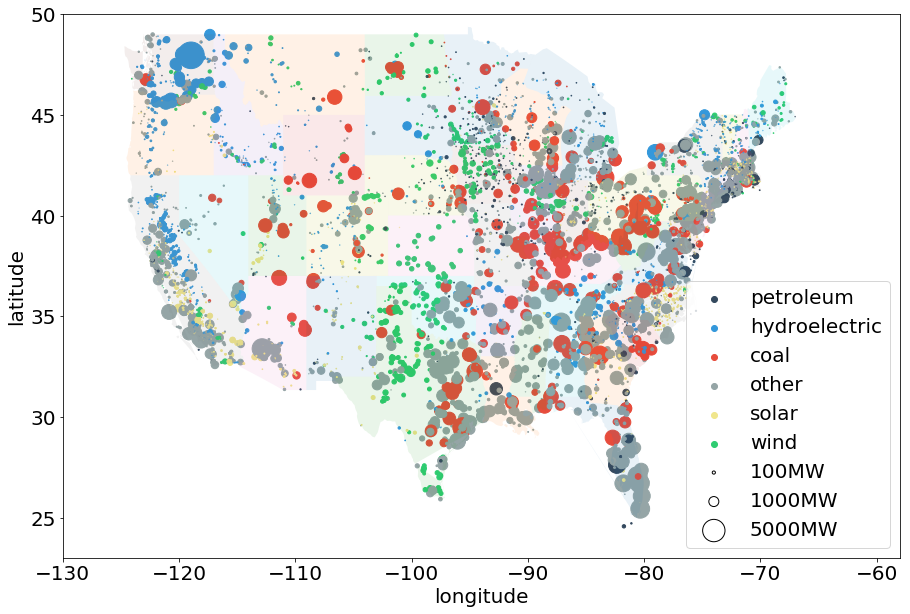

In [72]:
plt.figure(figsize=(15,10))
for shape in world['United States']:
    x = [p[0] for p in shape.points]
    y = [p[1] for p in shape.points]
    plt.fill(x,y, alpha = 0.1)
    
plt.scatter(powerplants["longitude"], powerplants["latitude"], s=powerplants["total_power"]/10, c=powerplants["colors"], label=None)
for k, c in colors.items():
    plt.scatter(1,1, c=c, label=k)
for s in [100, 1000,5000]:
    plt.scatter(1, 1, s=s/10,label=str(s)+"MW",facecolors='none', edgecolors='k')
plt.legend()
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.axis([-130, -58, 23,50])
plt.savefig("../plots/PowerPlantDistribution.png", dpi=200)

# Regression